In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

In [2]:
# load data
X_train = pd.read_csv('../Data/X_train.csv')
X_test = pd.read_csv('../Data/X_test.csv')
y_train = pd.read_csv('../Data/y_train.csv')
y_test = pd.read_csv('../Data/y_test.csv')

In [3]:
# delete the ID colomns
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_test = X_test.drop(X_test.columns[0], axis = 1)
y_train = y_train.drop(y_train.columns[0], axis = 1)
y_test = y_test.drop(y_test.columns[0], axis = 1)

In [4]:
# standardize the predictors
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# construct a KNN model
knn = KNeighborsRegressor(n_neighbors = 6)
# train the KNN model
knn.fit(X_train_scaled, y_train)
# test the KNN model
y_pred = knn.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, y_pred)
#print(knn_mse)


883366141113.1847
939875.5987433575


In [7]:
print(knn_mse**.5)

939875.5987433575


In [8]:
# construct a RF model
rf = RandomForestRegressor(n_estimators=100, bootstrap=True, max_features='sqrt')
# train the RF model
rf.fit(X_train, y_train)
# test the RF model
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)


<ipython-input-8-a9030231e8c0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [9]:
print(rf_mse**.5)

786077.1552912716


In [10]:
# construct a SVM model
svm = SVR(kernel='linear', C=5000)
# train the SVM model
svm.fit(X_train_scaled, y_train)
# test the SVM model
y_pred = svm.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, y_pred)


C:\Users\cubes\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
print(svm_mse**.5)

761672.5450164463


In [13]:
# construct a xgboost model
xgbooster = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3,
                             learning_rate = 0.1, max_depth = 10, alpha = 10,
                             n_estimators = 50)
# train the xgboost model 
xgbooster.fit(X_train, y_train)
# test the xgboost model
y_pred = xgbooster.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
print(xgb_mse)

[11:32:29] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
620978669061.129


In [14]:
print(xgb_mse**.5)

788021.9978281882


In [15]:
mse = [knn_mse, rf_mse, svm_mse, xgb_mse]

In [18]:
rmse = np.sqrt(np.array(mse))

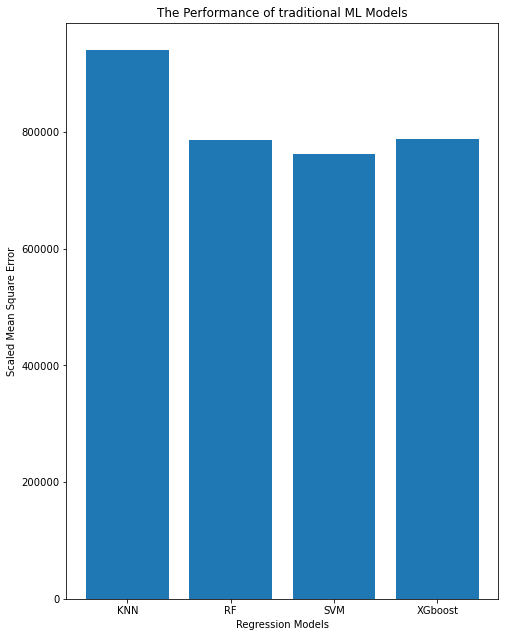

In [19]:
# plot the results
fig = plt.figure()
ax = fig.add_axes([0,0, 1,2])
models = ['KNN', 'RF', 'SVM', 'XGboost']
mse = [knn_mse, rf_mse, svm_mse, xgb_mse]
rmse = np.sqrt(np.array(mse))
ax.bar(models, rmse)
ax.set_xlabel('Regression Models')
ax.set_ylabel('Scaled Mean Square Error')
ax.set_title('The Performance of traditional ML Models')
plt.show()

## Two limitations or two areas of improvement:
1. Using the other categorical variables in the data set that are not present in the X_train tests set.
2. More importantly, there is no hyperparameter optimization. We can surely, improve results by optimizing hyperparameter search for each Algo. 
3. Include regularization techniques to improve performance even further. 